In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb, log, ceil

Task 1:

In [2]:
def probability_of_winning():
    total_combinations = comb(51, 6)
    return 1 / total_combinations

# Calculating the probability
prob_win = probability_of_winning()
print(f"Probability of winning: {prob_win}")

Probability of winning: 5.552637336155554e-08


Task 2:

Probability of Alexandra winning at lease once: 0.0016200564374689863
Total amount of money spent by Alexandra: $146000


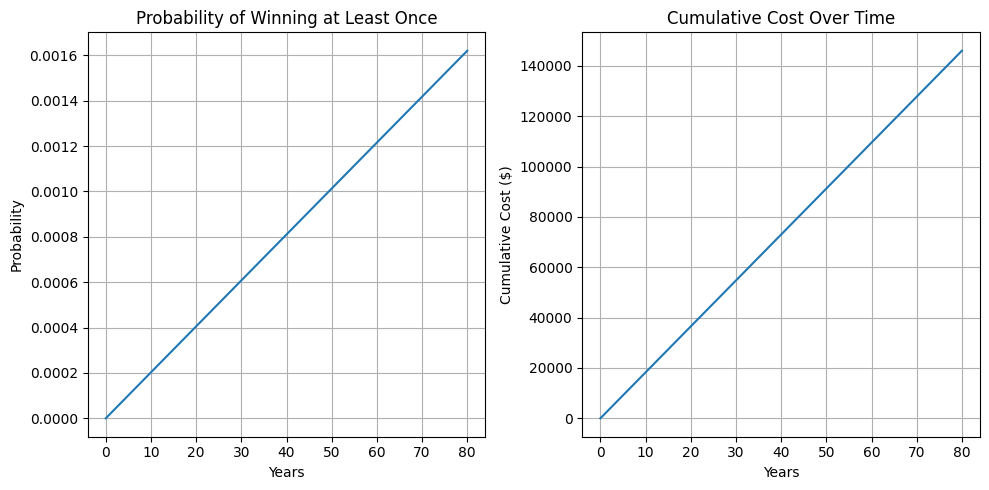

In [3]:
def alexandra_probability_and_cost(prob_win):
    years = 80
    days_per_year = 365
    days = days_per_year * years
    ticket_cost = 5
    total_cost = ticket_cost * days
    
    prob_not_win = (1 - prob_win) ** days
    prob_win_at_least_once = 1 - prob_not_win
    
    return prob_win_at_least_once, total_cost

# Calculating the probability and cost
alexandra_prob, alexandra_cost = alexandra_probability_and_cost(prob_win)

print(f"Probability of Alexandra winning at lease once: {alexandra_prob}")
print(f"Total amount of money spent by Alexandra: ${alexandra_cost}")

# Generating data to display as a visual
days = np.arange(1, 80 * 365 + 1)
cumulative_prob_no_win = (1 - prob_win) ** days
cumulative_prob_win = 1 - cumulative_prob_no_win
cumulative_cost = days * 5

# My visuals
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(days / 365, cumulative_prob_win)
plt.title("Probability of Winning at Least Once")
plt.xlabel('Years')
plt.ylabel('Probability')
plt.grid(True)

# Plotting the cumulative cost
plt.subplot(1, 2, 2)
plt.plot(days / 365, cumulative_cost)
plt.title('Cumulative Cost Over Time')
plt.xlabel('Years')
plt.ylabel('Cumulative Cost ($)')
plt.grid(True)

plt.tight_layout()
plt.show()

Task 3:

Minimum number of friends required for each epsilon:
Epsilon: 1e-05, Friends: 181
Epsilon: 0.001, Friends: 18019
Epsilon: 0.1, Friends: 1897486
Epsilon: 0.5, Friends: 12483207


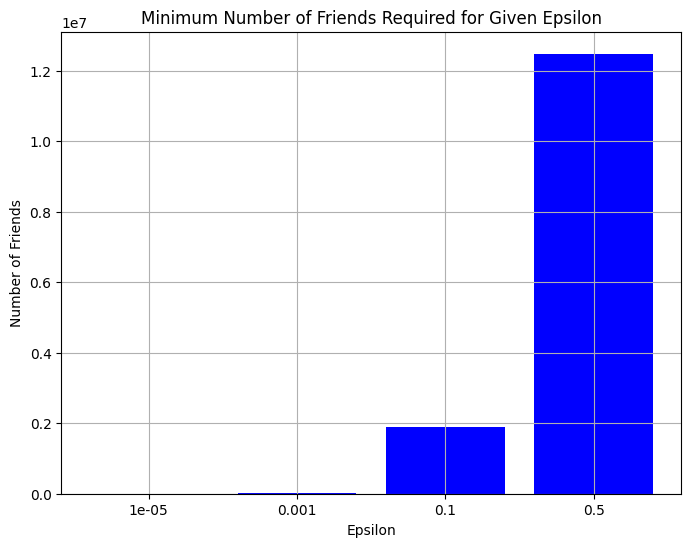

In [4]:
def minimum_friends(prob_win, epsilon):
    N = ceil(log(1 - epsilon) / log(1 - prob_win))
    return N

# Calculate N for various epsilons
epsilons = [1e-5, 1e-3, 0.1, 0.5]
friends_required = [minimum_friends(prob_win, epsilon) for epsilon in epsilons]

print("Minimum number of friends required for each epsilon:")
for epsilon, friends in zip(epsilons, friends_required):
    print(f"Epsilon: {epsilon}, Friends: {friends}")

# Plot the number of friends required for each epsilon
plt.figure(figsize=(8, 6))
plt.bar([str(epsilon) for epsilon in epsilons], friends_required, color='blue')
plt.title('Minimum Number of Friends Required for Given Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Number of Friends')
plt.grid(True)
plt.show()

Task 4:

In [5]:
def diversify_tickets(friends_count, num_combinations):
    from itertools import combinations
    all_combinations = list(combinations(range(1, 52), 6))
    unique_combinations = all_combinations[:friends_count]
    return unique_combinations

# Suppose Amir has N friends ensuring P(win) >= 0.5
epsilon_05 = 0.5
N_05 = minimum_friends(prob_win, epsilon_05)

# Generate diversified tickets for N friends
diversified_tickets = diversify_tickets(N_05, comb(51, 6))
print(f"Number of unique tickets generated: {len(diversified_tickets)}")

Number of unique tickets generated: 12483207


Task 5:

Probability of winning the consolation prize: 0.015758384760009462
Expected value of the consolation prize: $1.5758384760009463


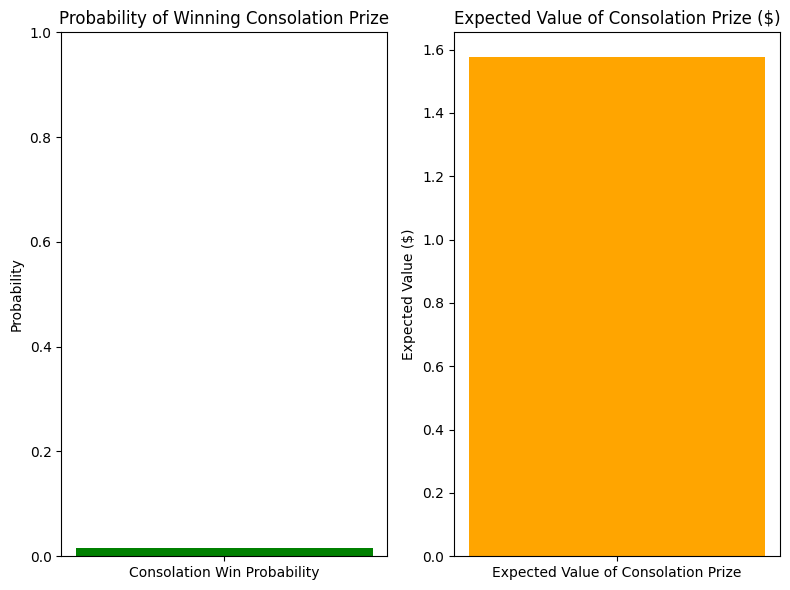

In [6]:
def probability_of_consolation():
    matches_3 = comb(6, 3)
    not_matches_3 = comb(45, 3)
    total_combinations = comb(51, 6)
    return (matches_3 * not_matches_3) / total_combinations

def expected_value_of_consolation(prize_amount):
    prob_consolation = probability_of_consolation()
    expected_value = prob_consolation * prize_amount
    return prob_consolation, expected_value

# Suppose the consolation prize is $100
consolation_prize_amount = 100
consolation_prob, consolation_expected_value = expected_value_of_consolation(consolation_prize_amount)

print(f"Probability of winning the consolation prize: {consolation_prob}")
print(f"Expected value of the consolation prize: ${consolation_expected_value}")

# Bar chart for probability and expected value
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.bar(['Consolation Win Probability'], [consolation_prob], color='green')
plt.title('Probability of Winning Consolation Prize')
plt.ylim(0, 1)
plt.ylabel('Probability')

plt.subplot(1, 2, 2)
plt.bar(['Expected Value of Consolation Prize'], [consolation_expected_value], color='orange')
plt.title('Expected Value of Consolation Prize ($)')
plt.ylabel('Expected Value ($)')

plt.tight_layout()
plt.show()